In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
data = pd.read_csv('./abalone.csv')
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [15]:
data['Sex'] = data.apply(lambda row: 1 if row['Sex'] == 'M' else (-1 if row['Sex'] == 'F' else 0), axis = 1)
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [16]:
X = data[data.columns[:-1]]
y = data['Rings']

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
scores = []
for i in range(1, 51):
    rfg = RandomForestRegressor(n_estimators = i, random_state = 1)
    cv = KFold(5, True, 1)
    scores.append((cross_val_score(rfg, X, y, cv = cv, scoring = 'r2').mean(), i))
sorted(scores)

[(0.10213869487724367, 1),
 (0.33841675515802144, 2),
 (0.40357984946186909, 3),
 (0.44272239896668103, 4),
 (0.46402076606749693, 5),
 (0.47058163275877918, 6),
 (0.47583061635230062, 7),
 (0.4817418456255852, 8),
 (0.4883478130215681, 9),
 (0.4933965550001963, 11),
 (0.49446412480247826, 10),
 (0.49796587639761541, 12),
 (0.50213646057228534, 13),
 (0.50642869622573283, 14),
 (0.50833119704321006, 15),
 (0.51051314383221469, 16),
 (0.51384829479930283, 17),
 (0.51632754127394931, 18),
 (0.51867359287238224, 20),
 (0.51903468813638798, 19),
 (0.51983542335425015, 21),
 (0.52015835367222107, 22),
 (0.52101727093662509, 23),
 (0.52240318258080909, 24),
 (0.52261746396760711, 25),
 (0.52380615817170517, 26),
 (0.52412235221889814, 27),
 (0.52505374512324399, 28),
 (0.52597037563489313, 29),
 (0.52653782166757546, 30),
 (0.52709985443060225, 31),
 (0.52837546602772023, 45),
 (0.52838940820927838, 32),
 (0.52852042754934581, 46),
 (0.52870494457919082, 47),
 (0.52906701596316297, 40),
 (0.

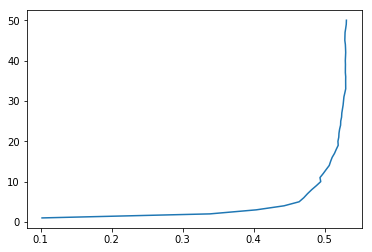

In [25]:
x_plot = [i[1] for i in scores]
y_plot = [i[0] for i in scores]
plt.plot(y_plot, x_plot)